# Multistart for migrad
Here, I want to implement a multistart optimization algorithm wrapped around migrad. It should return the best (lowest fval) Minuit object and a sorted list of all fvals.

Mental Notes:
* If there would be a `sp.optimize.minimize` compatible migrad function, I could make use of my `multistart` function.
* Probably I first have to learn about function-sig-label (see iminuit docu)
## Implementation

In [24]:
import scipy as sp
import numpy as np
from scipy import optimize

def multistart(fun, x0min, x0max, N, full_output = False, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None):
    res_list = sp.empty(N, dtype = object)
    for i in range(N):
        x0 = sp.random.uniform(x0min, x0max)
        # what goes here: res = sp.optimize.minimize(fun, x0, args, method, jac, hess, hessp, bounds, constraints, tol, callback, options)
        res_list[i] = res
    sort_res_list = res_list[sp.argsort([res.fun for res in res_list])]
    if full_output:
        return sort_res_list[0], sort_res_list
    else:
        return sort_res_list[0]

## Example

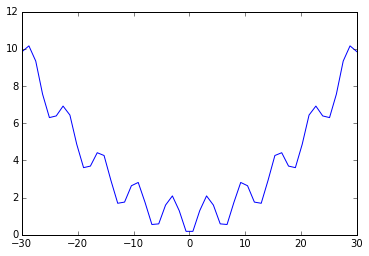

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

def fun(x):
    return - sp.cos(x) + 0.01 * x ** 2 + 1

x = sp.linspace(-30, 30)
plt.plot(x, fun(x));